In [50]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [51]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [52]:
df = pd.read_csv('/content/drive/MyDrive/DIGITAL_SKOLA/BankChurners.csv')
df

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.999910
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.999940
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.999980
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.999870
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.999980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,772366833,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,40,...,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462,0.000191,0.999810
10123,710638233,Attrited Customer,41,M,2,Unknown,Divorced,$40K - $60K,Blue,25,...,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511,0.995270,0.004729
10124,716506083,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,36,...,5409.0,0,5409.0,0.819,10291,60,0.818,0.000,0.997880,0.002118
10125,717406983,Attrited Customer,30,M,2,Graduate,Unknown,$40K - $60K,Blue,36,...,5281.0,0,5281.0,0.535,8395,62,0.722,0.000,0.996710,0.003294


In [53]:
df1 = df[df['Attrition_Flag'] == 'Existing Customer']
df2 = df[df['Attrition_Flag'] == 'Attrited Customer']

#DISTRIBUTION OF CHURNED CUSTOMERS

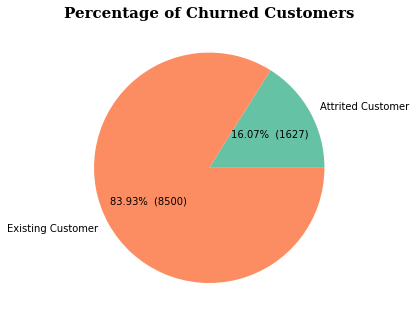

In [54]:
nasabah = pd.DataFrame(df.groupby('Attrition_Flag')['CLIENTNUM'].count().reset_index())

x = nasabah['CLIENTNUM']
labels = nasabah['Attrition_Flag']

colors = sns.color_palette("Set2")

#membuat fungsi untuk menampilkan value berupa persentase dan integer
def make_autopct(x):
    def my_autopct(pct):
        total = sum(x)
        val = int(round(pct*total/100.0))
        return '{p:.2f}%  ({v:d})'.format(p=pct,v=val)
    return my_autopct

#menentukan karakteristik elemen
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.pie(x, labels = labels, autopct=make_autopct(x), colors=colors)

#menentukan judul chart
plt.title('Percentage of Churned Customers', fontfamily = 'serif', fontsize=15, fontweight='bold')

#fungsi untuk menampilkan
plt.show()

Dari pie chart di atas, dapat dilihat perbandingan jumlah Existing Customer dan Attrited Customer. Saat ini tercatat sekitar 16.07% customer atau sebanyak 1627 customer berstatus 'Attrited'. Untuk customer berstatus 'Existing' saat ini tercatat sekitar 83.93% dari keseluruhan customer atau sebanyak 8500 customer.

#DISTRIBUTION OF CHURNED CUSTOMERS BY GENDER

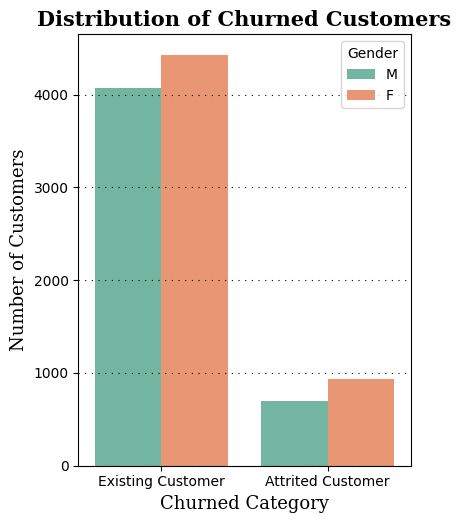

In [55]:
colors = sns.color_palette("Set2")

fig = plt.figure(figsize=(30,40), dpi=100)
gs = fig.add_gridspec(6,6)
ax0 = fig.add_subplot(gs[1, 1])

#set chart attributes
ax0 = sns.countplot(ax = ax0, x="Attrition_Flag", hue = 'Gender', data=df, palette = colors)
ax0.set_xlabel('Churned Category', fontsize = 13, fontfamily = 'serif')
ax0.set_ylabel('Number of Customers', fontsize = 13, fontfamily = 'serif')
ax0.set_title('Distribution of Churned Customers',fontfamily = 'serif', fontsize=15, fontweight = 'bold', loc='center')
ax0.grid(color='black', linestyle=':', axis='y', zorder=0,  dashes=(1,5))

plt.show()

Dari grafik di atas dapat dilihat perbandingan jumlah customer berdasarkan gender. Baik customer berstatus 'Existing' maupun 'Attrited', keduanya didominasi oleh wanita. Sehingga dapat disimpulkan bahwa dari keseluruhan customer, jumlah customer wanita lebih banyak dibandingkan customer pria.

#DISTRIBUTION OF CHURNED CUSTOMERS BY AGE

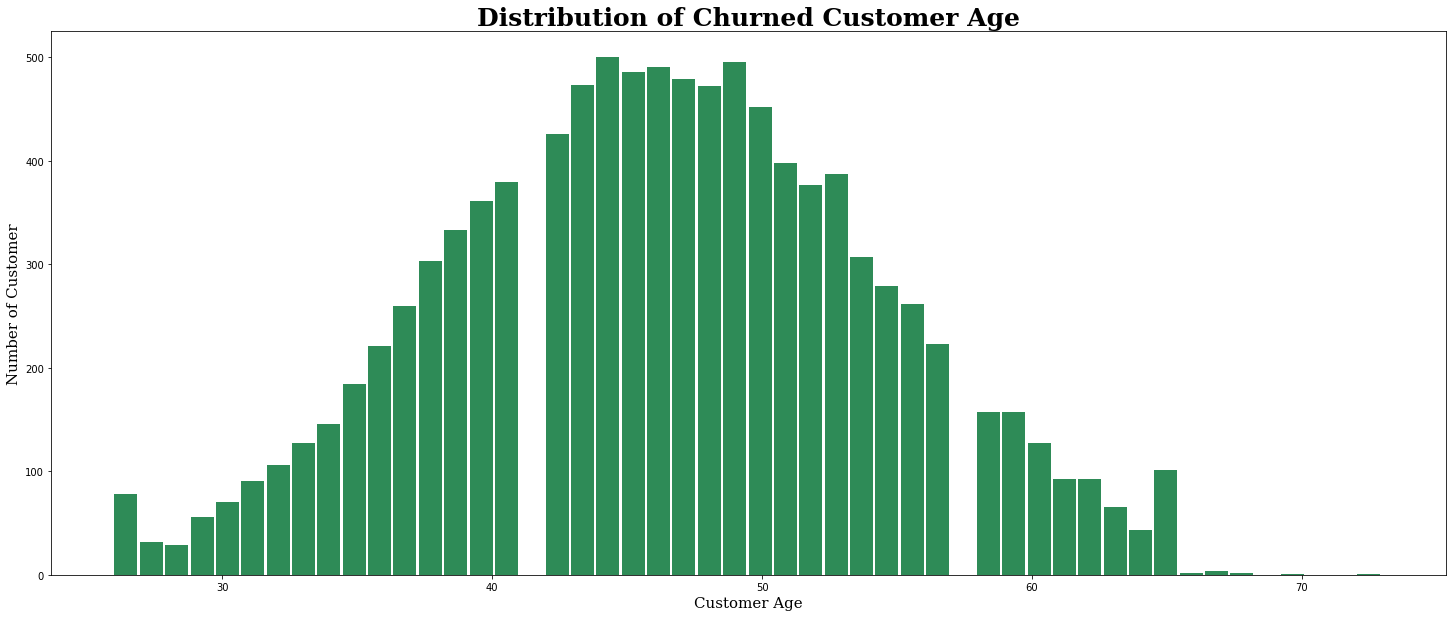

In [56]:
plt.figure(figsize=(25,10))
plt.hist(df['Customer_Age'], bins=50, color='seagreen', width=0.85)
plt.title('Distribution of Churned Customer Age',fontfamily = 'serif', fontsize=25, fontweight = 'bold', loc='center')
plt.xlabel('Customer Age', fontfamily = 'serif', fontsize=15)
plt.ylabel('Number of Customer', fontfamily = 'serif', fontsize=15)
plt.show()

Histogram di atas merepresentasikan persebaran umur dari para customer. Dapat dilihat bahwa umur customer berada di kisaran pertengahan 20 tahunan hingga hampir 70 tahun (20 < x < 70). Dan dari grafik persebaran tersebut dapat dilihat bahwa customer terbanyak berada di sekitar rentang umur 45 hingga 50 tahun yang mana mungkin di rentang umur tersebut para customer banyak yang sedang mempersiapkan dana pensiun.

#DISTRIBUTION OF CHURNED CUSTOMERS BY LEVEL EDUCATION

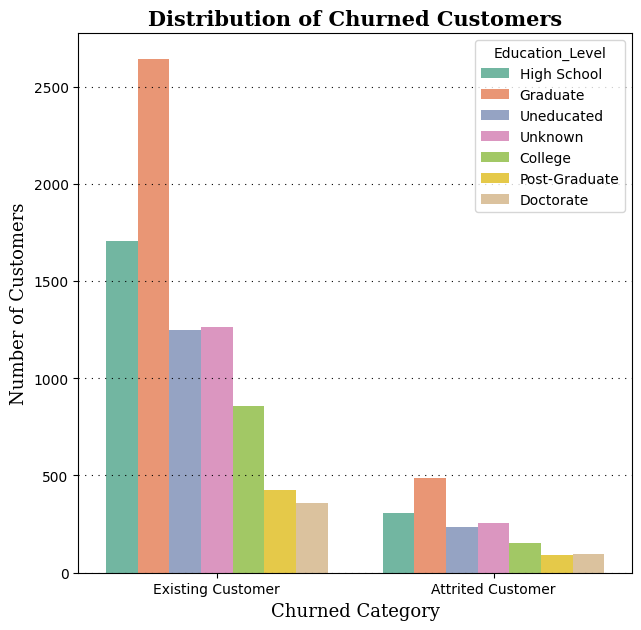

In [57]:
colors = sns.color_palette("Set2")

fig = plt.figure(figsize=(50,50), dpi=100)
gs = fig.add_gridspec(6,6)
ax1 = fig.add_subplot(gs[1, 1])

#set chart attribute
ax1 = sns.countplot(ax = ax1, x="Attrition_Flag", hue = 'Education_Level', data=df, palette = colors)
ax1.set_xlabel('Churned Category', fontsize = 13, fontfamily = 'serif')
ax1.set_ylabel('Number of Customers', fontsize = 13, fontfamily = 'serif')
ax1.set_title('Distribution of Churned Customers',fontfamily = 'serif', fontsize=15, fontweight = 'bold', loc='center')
ax1.grid(color='black', linestyle=':', axis='y', zorder=0,  dashes=(1,5))

plt.show()

Grafik di atas memberikan informasi tentang tingkat pendidikan dari para customer, baik yang berstatus 'Existing' maupun 'Attrited'. Persebaran level pendidikan para customer terlihat kurang lebih sama untuk kedua kategori status customer. Grafik menunjukkan porsi terbesar adalah 'Graduate' dan terkecil adalah 'Doctorate'.

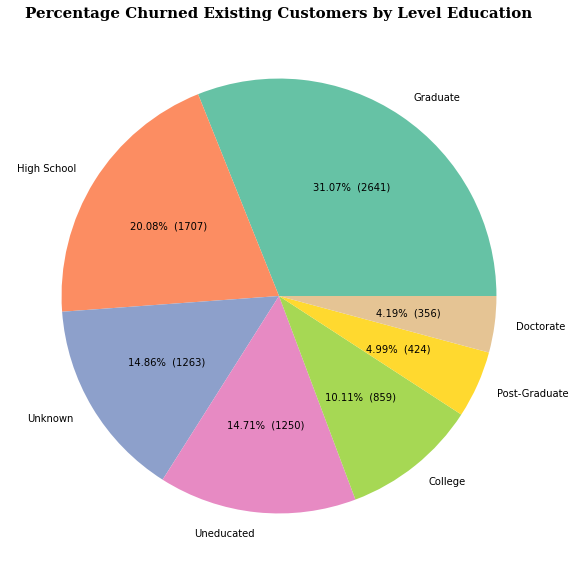

In [58]:
edu = df1['Education_Level'].value_counts().reset_index()

x = edu['Education_Level']
labels = edu['index']

colors = sns.color_palette("Set2")

#membuat fungsi untuk menampilkan value berupa persentase dan integer
def make_autopct(x):
    def my_autopct(pct):
        total = sum(x)
        val = int(round(pct*total/100.0))
        return '{p:.2f}%  ({v:d})'.format(p=pct,v=val)
    return my_autopct

#menentukan karakteristik elemen
fig = plt.figure(figsize=(15,10))
plt.pie(x, autopct=make_autopct(x), labels=labels, colors=colors)

#menentukan judul chart
plt.title('Percentage Churned Existing Customers by Level Education', fontfamily = 'serif', fontsize=15, fontweight='bold')

#fungsi untuk menampilkan
plt.show()

Pie chart di atas menunjukkan persebaran dari level pendidikan khusus para Existing Customer. Dalam chart ditunjukkan persentase dan juga jumlah customer secara eksplisit. Seperti di grafik sebelumnya, proporsi terbesar adalah customer dengan level pendidikan 'Graduate' yaitu 31.07% dari jumlah keseluruhan Existing Customer atau sebanyak 2641 orang. Setelah kategori 'Graduate', kemudian diikuti dengan kategori 'High School', 'Unknown', 'Uneducated', 'College', 'Post-Graduate' dan yang terakhir adalah 'Doctorate'. Sehingga dapat disimpulkan, bahwa kesadaran customer untuk menggunakan layanan tidak tergantung dengan level pendidikan mereka, karena dari grafik terlihat bahwa untuk customer dengan level pendidikan 'High School' bahkan 'Uneducated' cukup banyak.

#DISTRIBUTION OF CHURNED CUSTOMERS BY INCOME CATEGORY

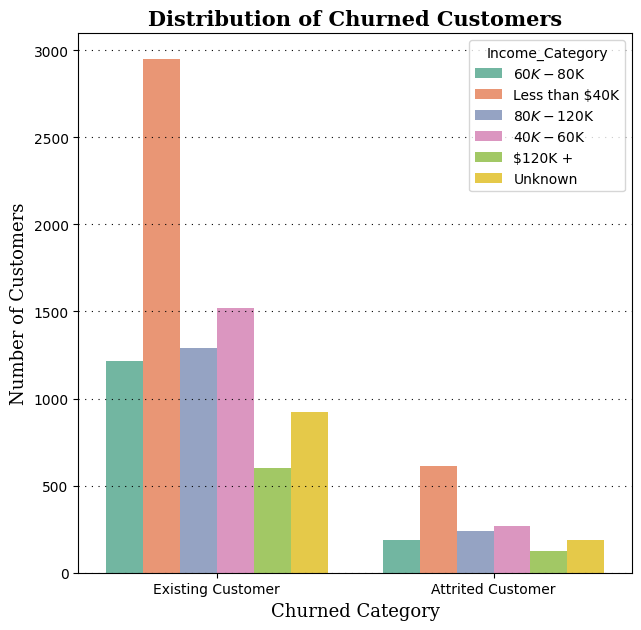

In [59]:
colors = sns.color_palette("Set2")

fig = plt.figure(figsize=(50,50), dpi=100)
gs = fig.add_gridspec(6,6)
ax2 = fig.add_subplot(gs[1, 1])

#set chart attributes
ax2 = sns.countplot(ax = ax2, x="Attrition_Flag", hue = 'Income_Category', data=df, palette = colors)
ax2.set_xlabel('Churned Category', fontsize = 13, fontfamily = 'serif')
ax2.set_ylabel('Number of Customers', fontsize = 13, fontfamily = 'serif')
ax2.set_title('Distribution of Churned Customers',fontfamily = 'serif', fontsize=15, fontweight = 'bold', loc='center')
ax2.grid(color='black', linestyle=':', axis='y', zorder=0,  dashes=(1,5))

plt.show()

Grafik di atas mempresentasikan proporsi customer berdasarkan Income Category dari masing-masing kategori customer. Dari kedua kategori customer, jumlah customer didominasi dengan kategori penghasilan di bawah $40K. Dan dari kedua kategori customer, 'Existing' dan 'Attrited', terlihat untuk perbandingan antara kategori Income berpola sama. 

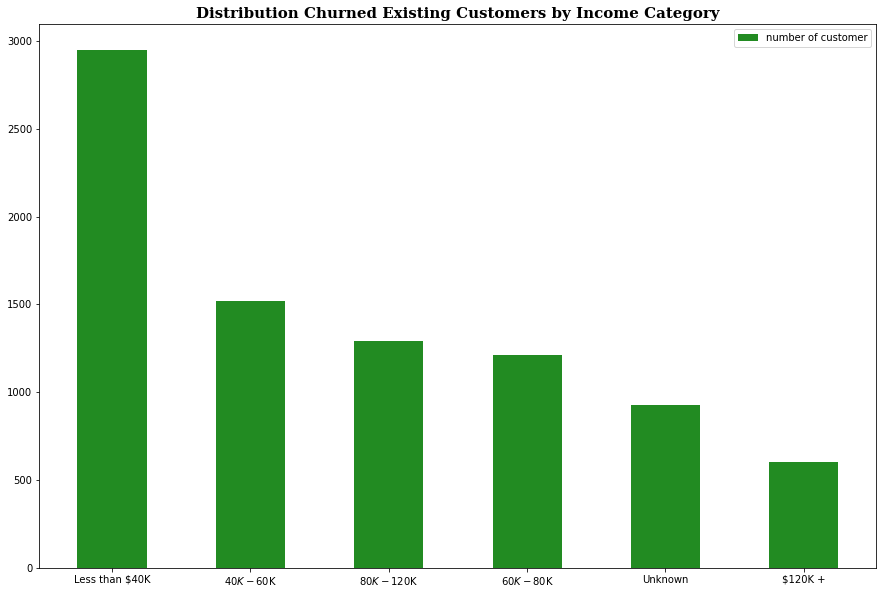

In [60]:
income = df1['Income_Category'].value_counts().reset_index()

plt.figure(figsize=(15,10))
plt.bar(income['index'], income['Income_Category'], width = 0.5, label='number of customer', color='forestgreen')

plt.legend()
plt.title('Distribution Churned Existing Customers by Income Category', fontfamily = 'serif', fontsize=15, fontweight='bold')
plt.show()

Perbandingan antar Income Category untuk Existing Customer

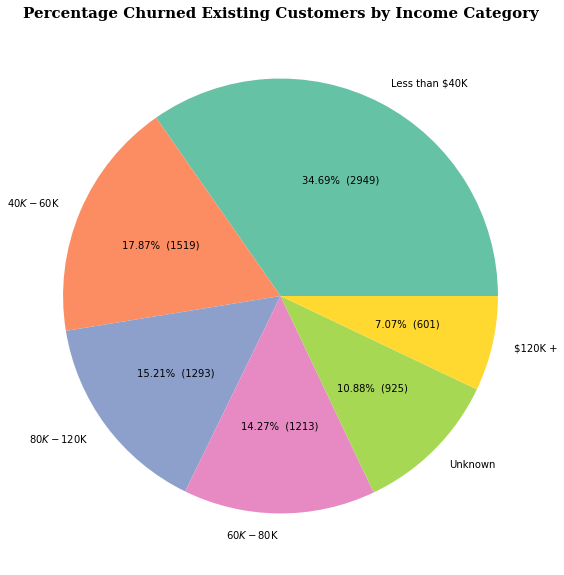

In [61]:
income = df1['Income_Category'].value_counts().reset_index()

x= income['Income_Category']
labels= income['index']

colors = sns.color_palette("Set2")

def make_autopct(x):
    def my_autopct(pct):
        total = sum(x)
        val = int(round(pct*total/100.0))
        return '{p:.2f}%  ({v:d})'.format(p=pct,v=val)
    return my_autopct

fig = plt.figure(figsize=(15,10))
plt.pie(x, labels=labels, autopct=make_autopct(x), colors=colors)

#menentukan judul chart
plt.title('Percentage Churned Existing Customers by Income Category', fontfamily = 'serif', fontsize=15, fontweight='bold')

#fungsi untuk menampilkan
plt.show()

Dari dua chart di atas tujuannya adalah sama, yaitu mempresentasikan proporsi Existing Customer berdasarkan kategori Income. Kategori dengan jumlah customer terbanyak adalah level income kurang dari 40K dan paling sedikit adalah dengan kategori income 120K+. Dari hasil tersebut mungkin dapat menggambarkan tingkat kebutuhan seorang untuk mendapatkan layanan berdasarkan income yang mereka miliki. Dengan income rendah yaitu di level kurang dari 40K, mungkin saja seseorang butuh sering menabung atau bahkan justru sering meminjam uang, sehingga banyak dari mereka yang bergabung. Namun sebaliknya, di level income tertinggi yaitu 120K+ justru jumlah customer lebih sedikit. Bisa jadi dikarenakan mereka merasa income mereka kurang cocok jika hanya disimpan di bank dan memilih menginvestasikannya di jenis properti lain.

#DISTRIBUTION OF TRANSACTION AMOUNT IN LAST 12 MONTH

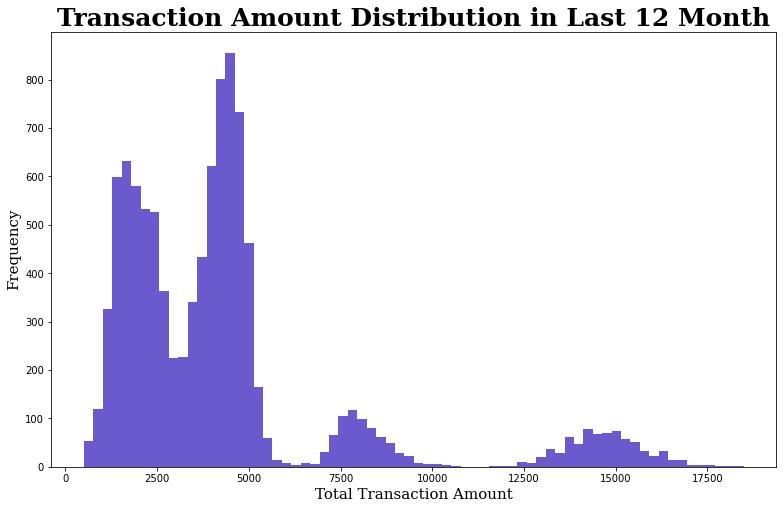

In [62]:
plt.figure(figsize=(13,8))
plt.hist(df['Total_Trans_Amt'], bins=70, color='slateblue')
plt.title('Transaction Amount Distribution in Last 12 Month',fontfamily = 'serif', fontsize=25, fontweight = 'bold', loc='center')
plt.xlabel('Total Transaction Amount', fontfamily = 'serif', fontsize=15)
plt.ylabel('Frequency', fontfamily = 'serif', fontsize=15)
plt.show()

Grafik di atas menunjukkan distribusi terkait jumlah transaksi selama 12 bulan terakhir, dan distribusi ini terlihat bukanlah distribusi normal. Dengan meletakkan nominal transaksi pada sumbu x dan frekuensi transaksi di sumbu y, maka dari histogram tersebut dapat dilihat nominal transaksi yang paling sering dilakukan selama 12 bulan terakhir, yaitu di kisaran 4000 hingga 5000. Frekuensi transaksi dengan nominal tersebut hampir menyentuh 1000 kali dalam 12 bulan terakhir.

#DISTRIBUTION OF TRANSACTION COUNT IN LAST 12 MONTH

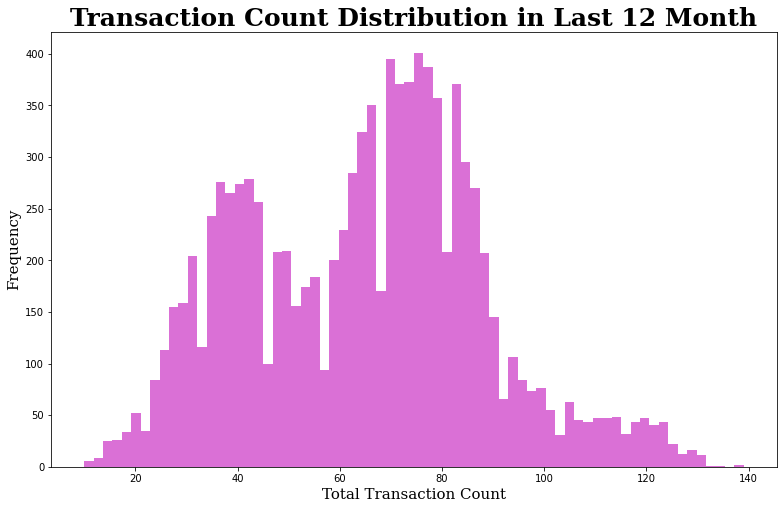

In [63]:
plt.figure(figsize=(13,8))
plt.hist(df['Total_Trans_Ct'], bins=70, color='orchid')
plt.title('Transaction Count Distribution in Last 12 Month',fontfamily = 'serif', fontsize=25, fontweight = 'bold', loc='center')
plt.xlabel('Total Transaction Count', fontfamily = 'serif', fontsize=15)
plt.ylabel('Frequency', fontfamily = 'serif', fontsize=15)
plt.show()

Dilihat dari histogram di atas, penyebaran data tentang 'Total Transaction Count' juga bukan termasuk distribusi normal. Total jumlah transaksi terbanyak berada di kisaran 70 hingga 80 yaitu dengan frekuensi lebih dari 350 kali selama 12 bulan terakhir.

#DISTRIBUTION OF CHURNED CUSTOMERS BY CARD CATEGORY

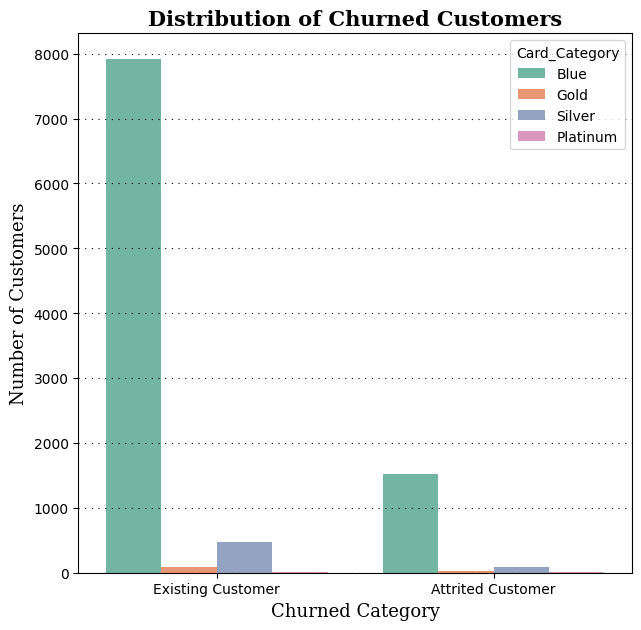

In [64]:
colors = sns.color_palette("Set2")

fig = plt.figure(figsize=(50,50), dpi=100)
gs = fig.add_gridspec(6,6)
ax3 = fig.add_subplot(gs[1, 1])

#set chart attributes
ax3 = sns.countplot(ax = ax3, x='Attrition_Flag', hue = 'Card_Category', data=df, palette = colors)
ax3.set_xlabel('Churned Category', fontsize = 13, fontfamily = 'serif')
ax3.set_ylabel('Number of Customers', fontsize = 13, fontfamily = 'serif')
ax3.set_title('Distribution of Churned Customers',fontfamily = 'serif', fontsize=15, fontweight = 'bold', loc='center')
ax3.grid(color='black', linestyle=':', axis='y', zorder=0,  dashes=(1,5))

plt.show()

Bar chart di atas merepresentasikan perbandingan jumlah customer berdasarkan kategori kartu yang mereka miliki. Baik customer berkategori 'Existing' maupun 'Attrited', kategori kartu yang paling banyak dimiliki oleh para customer adlaah 'Blue Card'. Untuk kategori kartu yang paling sedikit dimiliki adalah kategori Platinum. Pada umumnya kategori kartu ini didasarkan pada aktivitas customer dan jumlah transaksi yang telah dilakukannya. Maka sangat wajar ketika kategori kartu 'Blue Card' banyak dimiliki. Hal ini berkaitan dengan grafik 'Total Transaction Amount' yang mana menunjukkan transaksi terbanyak adalah di kisaran nominal yang tidak besar, yaitu 4000 - 5000.

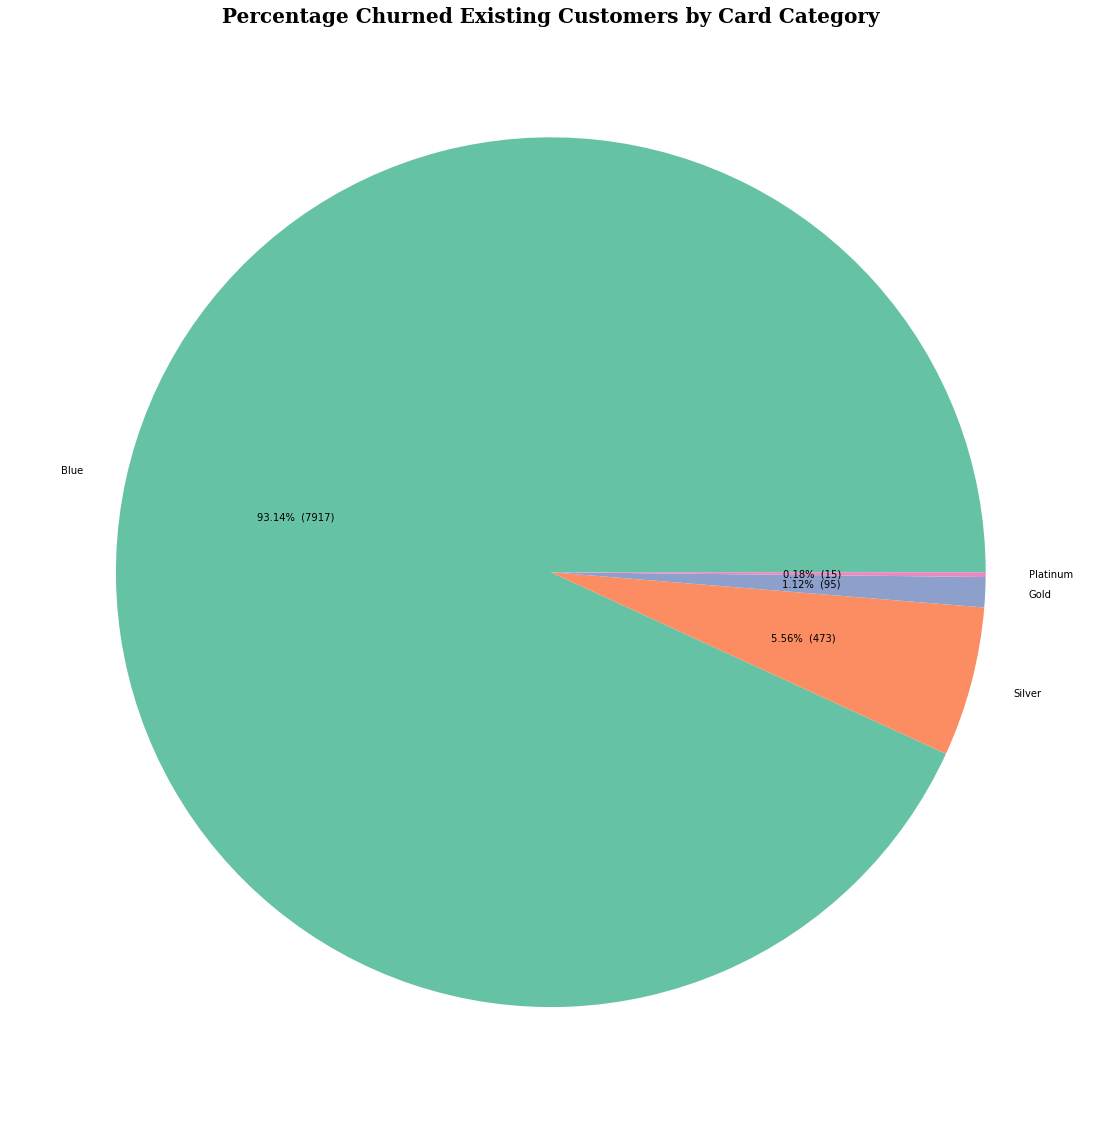

In [65]:
card = df1['Card_Category'].value_counts().reset_index()

x= card['Card_Category']
labels= card['index']

colors = sns.color_palette("Set2")

def make_autopct(x):
    def my_autopct(pct):
        total = sum(x)
        val = int(round(pct*total/100.0))
        return '{p:.2f}%  ({v:d})'.format(p=pct,v=val)
    return my_autopct

fig = plt.figure(figsize=(20,20))
plt.pie(x, labels=labels, autopct=make_autopct(x), colors=colors)

#menentukan judul chart
plt.title('Percentage Churned Existing Customers by Card Category', fontfamily = 'serif', fontsize=20, fontweight='bold')

#fungsi untuk menampilkan
plt.show()

Dengan pie chart di atas, dapat dilihat jumlah 'Existing Customer' dengan masing-masing kategori kartu yang merea miliki. 'Blue Card' dengan kartu terbanyak yaitu 7917 customer, 'Silver Card' dimiliki 473 customer, 'Gold Card' dimiliki oleh 95 customer dan 'Platinum Card' menjadi kategori  kartu yang paling sedikit pemiliknya yaitu hanya 15 customer.

#DISTRIBUTION OF CHURNED CUSTOMERS BY DEPENDENT COUNT

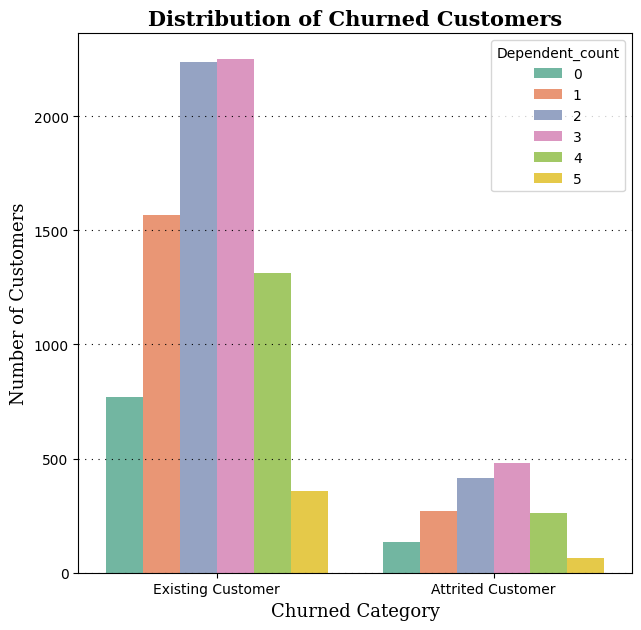

In [66]:
colors = sns.color_palette("Set2")

fig = plt.figure(figsize=(50,50), dpi=100)
gs = fig.add_gridspec(6,6)
ax4 = fig.add_subplot(gs[1, 1])

#set chart attributes
ax4 = sns.countplot(ax = ax4, x='Attrition_Flag', hue = 'Dependent_count', data=df, palette = colors)
ax4.set_xlabel('Churned Category', fontsize = 13, fontfamily = 'serif')
ax4.set_ylabel('Number of Customers', fontsize = 13, fontfamily = 'serif')
ax4.set_title('Distribution of Churned Customers',fontfamily = 'serif', fontsize=15, fontweight = 'bold', loc='center')
ax4.grid(color='black', linestyle=':', axis='y', zorder=0,  dashes=(1,5))

plt.show()

Grafik di atas menunjukkan distribusi jumlah tanggungan dari setiap customer. Jumlah tanggungan dikategorikan dari 0 tanggungan hingga 5 tanggungan dari setiap customer. Di 2 kategori customer, data terbanyak adalah customer dengan 3 tanggungan.

#DISTRIBUTION OF RELATIONSHIP PERIOD WITH BANK

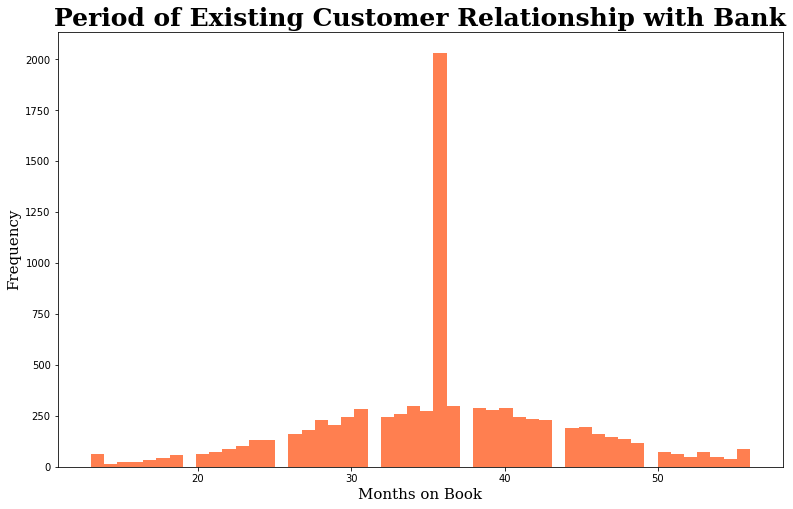

In [67]:
plt.figure(figsize=(13,8))
plt.hist(df1['Months_on_book'], bins=50, color='coral')
plt.title('Period of Existing Customer Relationship with Bank',fontfamily = 'serif', fontsize=25, fontweight = 'bold', loc='center')
plt.xlabel('Months on Book', fontfamily = 'serif', fontsize=15)
plt.ylabel('Frequency', fontfamily = 'serif', fontsize=15)
plt.show()

Histogram di atas menunjukkan distribusi data terkait waktu 'Existing Customer' berhubungan dengan bank, dalam artian bertransaksi ataupun menggunakan layanan lainnya. Terlihat ada satu waktu yang paling menonjol di grafik, yaitu di kisaran 35 bulan dengan total data sekitar 2000.

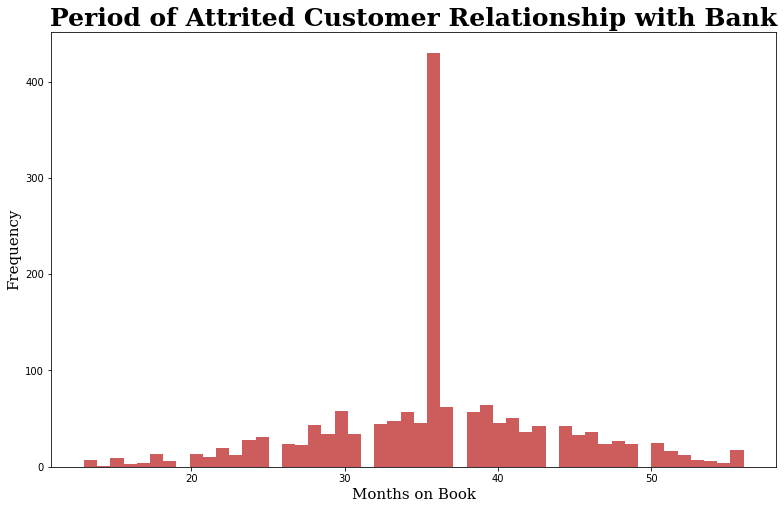

In [68]:
plt.figure(figsize=(13,8))
plt.hist(df2['Months_on_book'], bins=50, color='indianred')
plt.title('Period of Attrited Customer Relationship with Bank',fontfamily = 'serif', fontsize=25, fontweight = 'bold', loc='center')
plt.xlabel('Months on Book', fontfamily = 'serif', fontsize=15)
plt.ylabel('Frequency', fontfamily = 'serif', fontsize=15)
plt.show()

Histogram di atas menunjukkan distribusi data terkait waktu 'Attrited Customer' berhubungan dengan bank, dalam artian bertransaksi ataupun menggunakan layanan lainnya. Terlihat ada satu waktu yang paling menonjol di grafik, yaitu di kisaran 35 bulan dengan total data lebih dari 400.

#DISTRIBUTION OF CHURNED CUSTOMERS BY TOTAL RELATIONSHIP COUNT

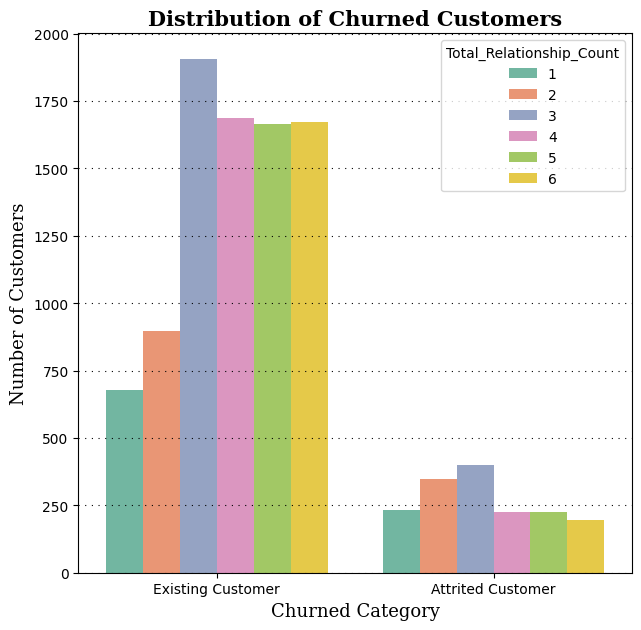

In [69]:
colors = sns.color_palette("Set2")

fig = plt.figure(figsize=(50,50), dpi=100)
gs = fig.add_gridspec(6,6)
ax5 = fig.add_subplot(gs[1, 1])

#set chart attributes
ax5 = sns.countplot(ax = ax5, x='Attrition_Flag', hue = 'Total_Relationship_Count', data=df, palette = colors)
ax5.set_xlabel('Churned Category', fontsize = 13, fontfamily = 'serif')
ax5.set_ylabel('Number of Customers', fontsize = 13, fontfamily = 'serif')
ax5.set_title('Distribution of Churned Customers',fontfamily = 'serif', fontsize=15, fontweight = 'bold', loc='center')
ax5.grid(color='black', linestyle=':', axis='y', zorder=0,  dashes=(1,5))

plt.show()

Chart di atas memberikan informasi tentang jumlah produk yang dimiliki oleh customer. Value untuk jumlah produk yang dimiliki customer yaitu dari 1 hingga 6 produk.Dari kedua kategori customer, data terbanyak ditunjukkan oleh customer dengan produk yang dimiliki sebanyak 3 jenis produk. Namun, untuk jumlah produk selain 3 produk per customer, terlihat perbedaan antara 'Existing Customer' dan 'Attrited Customer'. Terlihat bahwa 'Existing Customer' banyak yang memiliki produk lebih dari satu jenis. Bisa jaadi karena produk-produk yang dimilikinya adalah sesuai kebutuhan, maka mereka tetap bertahan sebagai customer.